# Objective: 
Visualize customer profiles and product popularity with advanced charts like heatmaps, cross-tabulations, and category-wise revenue breakdowns.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your cleaned order data
df = pd.read_csv(r'C:\Users\Durga\Desktop\Career 2025\MeriSkill\Order_Data_Cleaned.csv')

# Preview the data
df.head()

C:\Users\Durga\AppData\Local\Temp\ipykernel_15496\30212770.py:6: DtypeWarning: Columns (3,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'C:\Users\Durga\Desktop\Career 2025\MeriSkill\Order_Data_Cleaned.csv')


,OrderID,Region,Country,CustID,Customer_Name,ProductSKU,Product_Category,OrderLineItem,OrderQuantity,ProductCost,ProductPrice,OrderDate,AcquisitionSource,TransactionID,Fraud,PaymentMethod,CardType,Gender
0,SO45080,Northwest,United States,14657,JOHN THOMAS,BK-R50B-58,Plants,1,1.0,413.1463,699.0982,01-01-2020,Meta-ads\r,I4127227587819694,False,CREDITCARD,DISCOVER,M
1,SO45079,Southwest,United States,29255,KYLE WASHINGTON,BK-R93R-48,Plants,1,1.0,2171.2942,3578.27,01-01-2020,Google-ads\r,E9525730529761877,False,CREDITCARD,MC,M
2,SO45082,Australia,Australia,11455,ROSS SANZ,BK-M82B-44,Plants,1,1.0,1898.0944,3374.99,01-01-2020,Google-ads\r,Z6376643485803420,False,CREDITCARD,VISA,M
3,SO45081,Canada,Canada,26782,SETH LEWIS,BK-R50B-44,Plants,1,1.0,413.1463,699.0982,01-01-2020,Google-ads\r,R8609290025411138,False,CREDITCARD,VISA,M
4,SO45083,United Kingdom,United Kingdom,14947,ALEJANDRO CHEN,BK-R93R-48,Plants,1,1.0,2171.2942,3578.27,02-01-2020,Meta-ads\r,Y9572700698484288,False,CREDITCARD,VISA,M


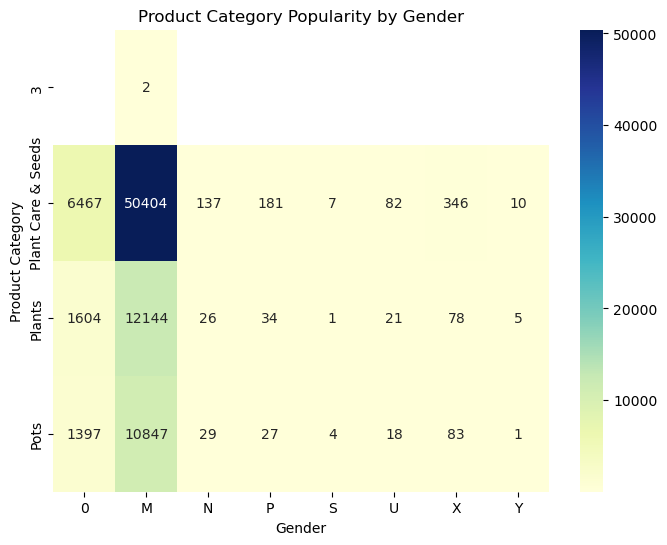

In [5]:
category_gender = df.pivot_table(
    index='Product_Category',
    columns='Gender',
    values='OrderQuantity',
    aggfunc='sum'
)

plt.figure(figsize=(8,6))
sns.heatmap(category_gender, annot=True, cmap='YlGnBu', fmt='.0f')
plt.title('Product Category Popularity by Gender')
plt.ylabel('Product Category')
plt.xlabel('Gender')
plt.show()

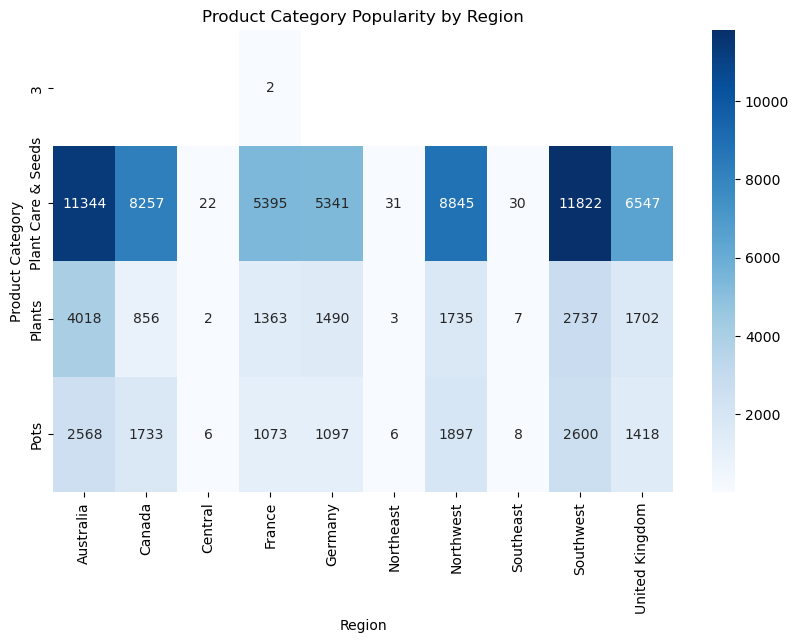

In [7]:
category_region = df.pivot_table(
    index='Product_Category',
    columns='Region',
    values='OrderQuantity',
    aggfunc='sum'
)

plt.figure(figsize=(10,6))
sns.heatmap(category_region, annot=True, cmap='Blues', fmt='.0f')
plt.title('Product Category Popularity by Region')
plt.ylabel('Product Category')
plt.xlabel('Region')
plt.show()

In [9]:
# Step 1: Make sure ProductPrice and OrderQuantity are numeric
df['OrderQuantity'] = pd.to_numeric(df['OrderQuantity'], errors='coerce')
df['ProductPrice'] = pd.to_numeric(df['ProductPrice'], errors='coerce')

# Step 2: Calculate Revenue
df['Revenue'] = df['OrderQuantity'] * df['ProductPrice']

In [15]:
customer_segments = df.groupby('CustID').agg(
    total_orders=('OrderID', 'nunique'),
    total_quantity=('OrderQuantity', 'sum'),
    total_revenue=('Revenue', 'sum')
).reset_index()

customer_segments['AOV'] = customer_segments['total_revenue'] / customer_segments['total_orders']

# Segment classification
percentiles = customer_segments['total_revenue'].quantile([0.5, 0.9]).values
low_val, high_val = percentiles[0], percentiles[1]

def segment_customer(row):
    if row['total_revenue'] > high_val:
        return 'High Value'
    elif row['total_revenue'] > low_val:
        return 'Mid Value'
    else:
        return 'Low Value'

customer_segments['Segment'] = customer_segments.apply(segment_customer, axis=1)

In [17]:
df = df.merge(customer_segments[['CustID', 'Segment']], on='CustID', how='left')

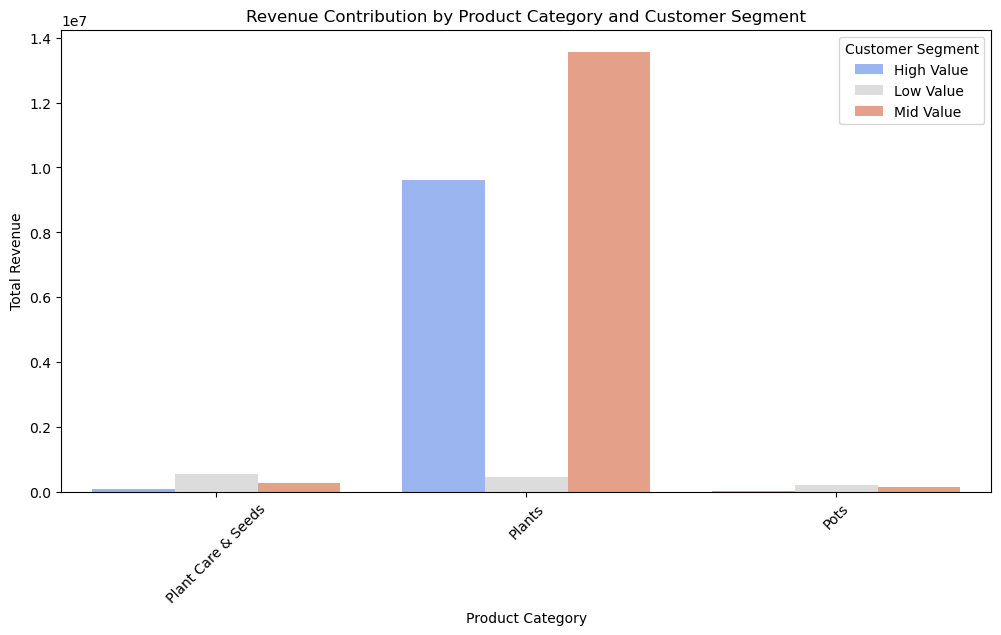

In [21]:
# Remove rows with incorrect Product_Category values
df = df[df['Product_Category'] != '3']

category_segment = df.groupby(['Product_Category', 'Segment'])['Revenue'].sum().reset_index()

plt.figure(figsize=(12,6))
sns.barplot(x='Product_Category', y='Revenue', hue='Segment', data=category_segment, palette='coolwarm')
plt.title('Revenue Contribution by Product Category and Customer Segment')
plt.ylabel('Total Revenue')
plt.xlabel('Product Category')
plt.xticks(rotation=45)
plt.legend(title='Customer Segment')
plt.show()

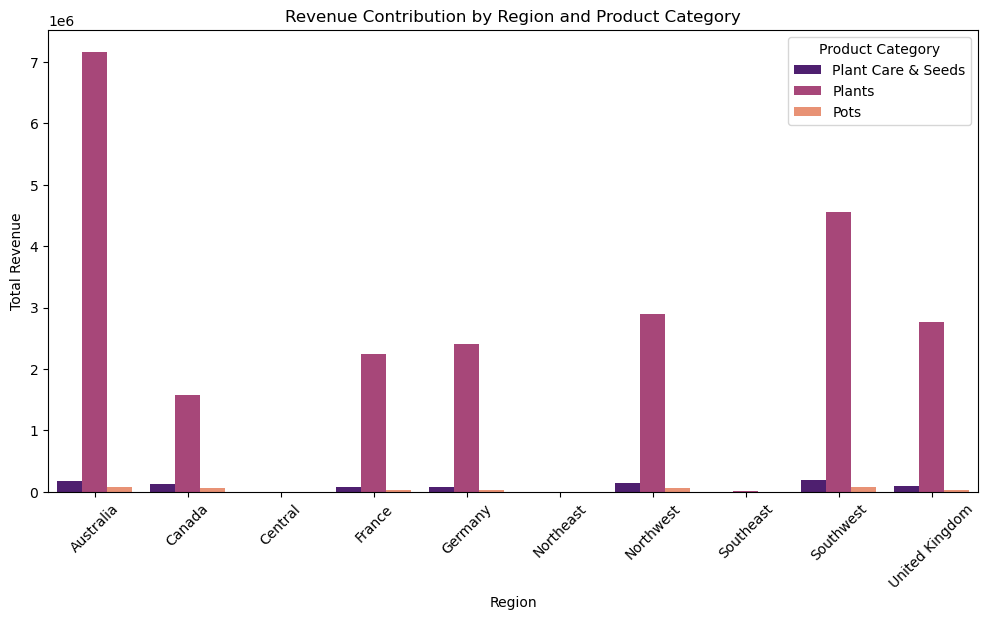

In [23]:
region_category = df.groupby(['Region', 'Product_Category'])['Revenue'].sum().reset_index()

plt.figure(figsize=(12,6))
sns.barplot(x='Region', y='Revenue', hue='Product_Category', data=region_category, palette='magma')
plt.title('Revenue Contribution by Region and Product Category')
plt.ylabel('Total Revenue')
plt.xlabel('Region')
plt.xticks(rotation=45)
plt.legend(title='Product Category')
plt.show()

## Key Insights — Customer Profiles & Revenue Breakdown

- **Product Category vs. Customer Segment:**  
   - The **Plant** category generates the highest revenue across all customer segments, with high-value customers contributing the largest share.
   - **Plant Care & Seeds** are most popular among mid-value and low-value customers, indicating they are affordable and repeat-purchased items.
   - The **Pots** category has lower overall revenue but shows potential for upselling among mid-value customers.

- **Region-wise Insights (if visualized):**  
   - Certain regions contribute heavily to premium product revenue, indicating regional market strength.
   - Opportunity exists to expand low-performing categories in underpenetrated regions.

- **Customer Segment Observation:**  
   - High-value customers show a tendency to purchase premium products (high-ticket plant items).
   - Mid-value customers have diverse purchasing behavior — they are strong candidates for loyalty-building campaigns.
   - Low-value customers contribute mostly to lower-priced categories and can be targeted for entry-level offers.

### Recommendations:
- Strengthen premium product marketing for high-value customers with exclusive early access or VIP offers.
- Launch cross-selling campaigns pairing **Plant Care & Seeds** with premium plants to increase mid-tier customer spend.
- Run regional promotions in areas where pots and accessories underperform, to boost category diversification.